In [13]:
#General imports
import Degeneration as DegGen
import matplotlib.pyplot as plt
import ImageHelper as ImgHelper
from scipy import misc as scipyMisc
import LabelDictionary as Labels

import Training as Training
import Scorer
import numpy as np

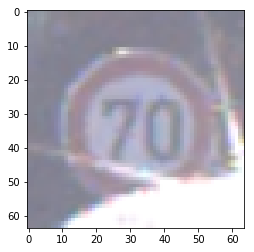

In [2]:
#Load resource - resource folder with ppm images is needed in Medusa folder
img = ImgHelper.load_ppm_image("images/70.ppm")
plt.imshow(img)
plt.show()

In [3]:
# Load model - Trained model is needed in Medusa folder
aphrodite = Training.load_model('Aphrodite.h5')
# aphrodite.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 128)       0         
__________

In [4]:
# Predict our image local:
prediction = aphrodite.predict(np.expand_dims(img,0))[0]

bestClass = prediction.argmax()
bestScore = prediction[bestClass]

print("Aphrodite predicts the image belongs to class: ", bestClass , ":", Labels.GTSRB_INT_TO_LABEL[bestClass], " with Score", bestScore)

Aphrodite predicts the image belongs to class:  4 : 70_speed  with Score 1.0


StartConfidence: 0.9999192


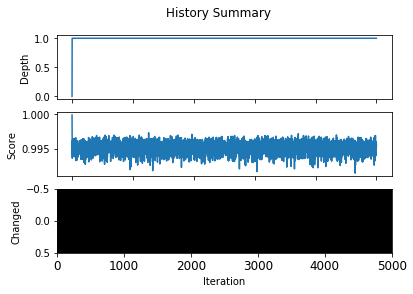

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


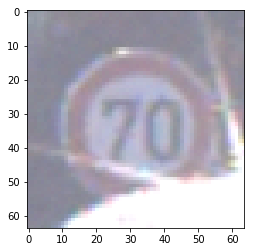

In [7]:
#Local Degeneration
alternation=DegGen.chain([DegGen._softNoise,DegGen._brigten,DegGen._noise,DegGen._normalize])

ans = DegGen.degenerate(aphrodite, img, bestClass, alternation, decay=0.001, iterations=1000, maxloops=5000,verbose=False,history=True)
#scipyMisc.imsave("images/localDegenerated.png",ans[1])
plt.imshow(ans[1])

In [8]:
# Predict our image local:
degPrediction = aphrodite.predict(np.expand_dims(ans[1],0))[0]

degClass = degPrediction.argmax()
degScore = degPrediction[bestClass]

print("Aphrodite predicts the image belongs to class: ", degClass , ":", Labels.GTSRB_INT_TO_LABEL[degClass], " with Score", degScore)

Aphrodite predicts the image belongs to class:  4 : 70_speed  with Score 1.0


<Response [200]>

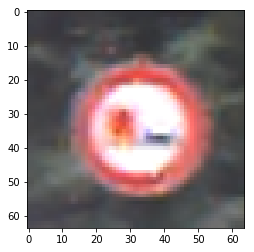

In [14]:
#Load resource - resource folder with ppm images is needed in Medusa folder
remoteImg =ImgHelper.load_ppm_image("images/overtaking.ppm")
plt.imshow(remoteImg)


In [20]:
#Remote Degeneration
remoteAlternation = DegGen.chain([DegGen._normalize,DegGen._softNoise])

print(Scorer.send_ppm_image(remoteImg))
deg = remoteAlternation(remoteImg)
print(Scorer.send_ppm_image(deg))

<Response [200]>
<Response [200]>


StartConfidence: 0.97628981
Score: 0.87828809 Depth: 0 Loop: 1
Score: 0.89090222 Depth: 0 Loop: 2
Score: 0.91777527 Depth: 0 Loop: 3
Score: 0.95343953 Depth: 0 Loop: 4
Score: 0.90595502 Depth: 0 Loop: 5
Score: 0.93278289 Depth: 0 Loop: 6
Score: 0.92178249 Depth: 0 Loop: 7
Score: 0.90272033 Depth: 0 Loop: 8
Score: 0.95441109 Depth: 0 Loop: 9
Score: 0.90405703 Depth: 0 Loop: 10
Score: 0.92605579 Depth: 0 Loop: 11
Score: 0.87564927 Depth: 0 Loop: 12
Score: 0.94895291 Depth: 0 Loop: 13
Score: 0.94708902 Depth: 0 Loop: 14
Score: 0.88716346 Depth: 0 Loop: 15
Score: 0.95611143 Depth: 0 Loop: 16
Score: 0.94673669 Depth: 0 Loop: 17
Score: 0.94951606 Depth: 0 Loop: 18
Score: 0.88913035 Depth: 0 Loop: 19
Score: 0.94308585 Depth: 0 Loop: 20
Score: 0.93090189 Depth: 0 Loop: 21
Score: 0.87881064 Depth: 0 Loop: 22
Score: 0.94358784 Depth: 0 Loop: 23
Score: 0.9210183 Depth: 0 Loop: 24
Score: 0.94910878 Depth: 0 Loop: 25
Score: 0.8984921 Depth: 0 Loop: 26
Score: 0.9192996 Depth: 0 Loop: 27
Score: 0.877

Score: 0.85233468 Depth: 1 Loop: 226
Score: 0.90120161 Depth: 1 Loop: 227
Score: 0.88379514 Depth: 1 Loop: 228
Score: 0.87404495 Depth: 1 Loop: 229
Score: 0.91696304 Depth: 1 Loop: 230
Score: 0.87562925 Depth: 1 Loop: 231
Score: 0.87782818 Depth: 1 Loop: 232
Score: 0.92050582 Depth: 1 Loop: 233
Score: 0.86173105 Depth: 1 Loop: 234
Score: 0.89543003 Depth: 1 Loop: 235
Score: 0.93926895 Depth: 1 Loop: 236
Score: 0.90650249 Depth: 1 Loop: 237
Score: 0.91766012 Depth: 1 Loop: 238
Score: 0.89330506 Depth: 1 Loop: 239
Score: 0.9071573 Depth: 1 Loop: 240
Score: 0.91533494 Depth: 1 Loop: 241
Score: 0.84576946 Depth: 1 Loop: 242
Score: 0.8657158 Depth: 1 Loop: 243
Score: 0.92397088 Depth: 1 Loop: 244
Score: 0.91837698 Depth: 1 Loop: 245
Score: 0.88578629 Depth: 1 Loop: 246
Score: 0.77238357 Depth: 1 Loop: 247
Score: 0.85631186 Depth: 1 Loop: 248
Score: 0.89613664 Depth: 1 Loop: 249
Score: 0.87753224 Depth: 1 Loop: 250
Score: 0.91892803 Depth: 1 Loop: 251
Score: 0.91008735 Depth: 1 Loop: 252
Sco

Score: 0.87447381 Depth: 1 Loop: 449
Score: 0.85045999 Depth: 1 Loop: 450
Score: 0.91595566 Depth: 1 Loop: 451
Score: 0.94193888 Depth: 1 Loop: 452
Score: 0.88214141 Depth: 1 Loop: 453
Score: 0.94838518 Depth: 1 Loop: 454
Score: 0.88412017 Depth: 1 Loop: 455
Score: 0.93399113 Depth: 1 Loop: 456
Score: 0.95522779 Depth: 1 Loop: 457
Score: 0.90754992 Depth: 1 Loop: 458
Score: 0.91080356 Depth: 1 Loop: 459
Score: 0.93913341 Depth: 1 Loop: 460
Score: 0.95581335 Depth: 1 Loop: 461
Score: 0.9409368 Depth: 1 Loop: 462
Score: 0.94711703 Depth: 1 Loop: 463
Score: 0.88369089 Depth: 1 Loop: 464
Score: 0.8936367 Depth: 1 Loop: 465
Score: 0.93365955 Depth: 1 Loop: 466
Score: 0.91258407 Depth: 1 Loop: 467
Score: 0.88993818 Depth: 1 Loop: 468
Score: 0.93898296 Depth: 1 Loop: 469
Score: 0.86677653 Depth: 1 Loop: 470
Score: 0.90805042 Depth: 1 Loop: 471
Score: 0.94675261 Depth: 1 Loop: 472
Score: 0.90738761 Depth: 1 Loop: 473
Score: 0.91770536 Depth: 1 Loop: 474
Score: 0.93169242 Depth: 1 Loop: 475
Sco

Score: 0.86390829 Depth: 1 Loop: 672
Score: 0.81746876 Depth: 1 Loop: 673
Score: 0.91338307 Depth: 1 Loop: 674
Score: 0.90460235 Depth: 1 Loop: 675
Score: 0.91612846 Depth: 1 Loop: 676
Score: 0.87505966 Depth: 1 Loop: 677
Score: 0.94022745 Depth: 1 Loop: 678
Score: 0.86965829 Depth: 1 Loop: 679
Score: 0.92124182 Depth: 1 Loop: 680
Score: 0.90536129 Depth: 1 Loop: 681
Score: 0.91931117 Depth: 1 Loop: 682
Score: 0.88822442 Depth: 1 Loop: 683
Score: 0.88472921 Depth: 1 Loop: 684
Score: 0.87077385 Depth: 1 Loop: 685
Score: 0.91901511 Depth: 1 Loop: 686
Score: 0.84987736 Depth: 1 Loop: 687
Score: 0.88850272 Depth: 1 Loop: 688
Score: 0.9268145 Depth: 1 Loop: 689
Score: 0.93779814 Depth: 1 Loop: 690
Score: 0.90643936 Depth: 1 Loop: 691
Score: 0.95317996 Depth: 1 Loop: 692
Score: 0.84285164 Depth: 1 Loop: 693
Score: 0.88727093 Depth: 1 Loop: 694
Score: 0.90096313 Depth: 1 Loop: 695
Score: 0.85151559 Depth: 1 Loop: 696
Score: 0.92314577 Depth: 1 Loop: 697
Score: 0.86465287 Depth: 1 Loop: 698
Sc

Score: 0.8817389 Depth: 1 Loop: 895
Score: 0.87981033 Depth: 1 Loop: 896
Score: 0.91024911 Depth: 1 Loop: 897
Score: 0.91584116 Depth: 1 Loop: 898
Score: 0.91060883 Depth: 1 Loop: 899
Score: 0.88014632 Depth: 1 Loop: 900
Score: 0.93813837 Depth: 1 Loop: 901
Score: 0.83236486 Depth: 1 Loop: 902
Score: 0.91678393 Depth: 1 Loop: 903
Score: 0.8972615 Depth: 1 Loop: 904
Score: 0.94658899 Depth: 1 Loop: 905
Score: 0.91833168 Depth: 1 Loop: 906
Score: 0.83306551 Depth: 1 Loop: 907
Score: 0.86967611 Depth: 1 Loop: 908
Score: 0.88058847 Depth: 1 Loop: 909
Score: 0.9215591 Depth: 1 Loop: 910
Score: 0.92635721 Depth: 1 Loop: 911
Score: 0.89499497 Depth: 1 Loop: 912
Score: 0.8266573 Depth: 1 Loop: 913
Score: 0.91784334 Depth: 1 Loop: 914
Score: 0.94433457 Depth: 1 Loop: 915
Score: 0.86936939 Depth: 1 Loop: 916
Score: 0.93030316 Depth: 1 Loop: 917
Score: 0.85410511 Depth: 1 Loop: 918
Score: 0.90319669 Depth: 1 Loop: 919
Score: 0.91187084 Depth: 1 Loop: 920
Score: 0.91846478 Depth: 1 Loop: 921
Score

Score: 0.78965783 Depth: 1 Loop: 1114
Score: 0.92833197 Depth: 1 Loop: 1115
Score: 0.80780429 Depth: 1 Loop: 1116
Score: 0.88488358 Depth: 1 Loop: 1117
Score: 0.94208556 Depth: 1 Loop: 1118
Score: 0.72179329 Depth: 1 Loop: 1119
Score: 0.89354235 Depth: 1 Loop: 1120
Score: 0.88995463 Depth: 1 Loop: 1121
Score: 0.90456671 Depth: 1 Loop: 1122
Score: 0.87915975 Depth: 1 Loop: 1123
Score: 0.89811087 Depth: 1 Loop: 1124
Score: 0.92353654 Depth: 1 Loop: 1125
Score: 0.85452223 Depth: 1 Loop: 1126
Score: 0.89598924 Depth: 1 Loop: 1127
Score: 0.91683578 Depth: 1 Loop: 1128
Score: 0.92122972 Depth: 1 Loop: 1129
Score: 0.92983514 Depth: 1 Loop: 1130
Score: 0.89921635 Depth: 1 Loop: 1131
Score: 0.90801495 Depth: 1 Loop: 1132
Score: 0.89467078 Depth: 1 Loop: 1133
Score: 0.90110791 Depth: 1 Loop: 1134
Score: 0.9155491 Depth: 1 Loop: 1135
Score: 0.8899045 Depth: 1 Loop: 1136
Score: 0.92647976 Depth: 1 Loop: 1137
Score: 0.91722882 Depth: 1 Loop: 1138
Score: 0.87091678 Depth: 1 Loop: 1139
Score: 0.94323

Score: 0.897681 Depth: 1 Loop: 1331
Score: 0.93754721 Depth: 1 Loop: 1332
Score: 0.89119506 Depth: 1 Loop: 1333
Score: 0.90765566 Depth: 1 Loop: 1334
Score: 0.90252483 Depth: 1 Loop: 1335
Score: 0.92775053 Depth: 1 Loop: 1336
Score: 0.89743876 Depth: 1 Loop: 1337
Score: 0.88249457 Depth: 1 Loop: 1338
Score: 0.9273988 Depth: 1 Loop: 1339
Score: 0.89642972 Depth: 1 Loop: 1340
Score: 0.91804314 Depth: 1 Loop: 1341
Score: 0.94426697 Depth: 1 Loop: 1342
Score: 0.89324534 Depth: 1 Loop: 1343
Score: 0.84202558 Depth: 1 Loop: 1344
Score: 0.88489687 Depth: 1 Loop: 1345
Score: 0.82205737 Depth: 1 Loop: 1346
Score: 0.92090362 Depth: 1 Loop: 1347
Score: 0.92676115 Depth: 1 Loop: 1348
Score: 0.90997767 Depth: 1 Loop: 1349
Score: 0.86177522 Depth: 1 Loop: 1350
Score: 0.89113081 Depth: 1 Loop: 1351
Score: 0.93664777 Depth: 1 Loop: 1352
Score: 0.89073515 Depth: 1 Loop: 1353
Score: 0.90255666 Depth: 1 Loop: 1354
Score: 0.90190649 Depth: 1 Loop: 1355
Score: 0.90722597 Depth: 1 Loop: 1356
Score: 0.922049

Score: 0.9283725 Depth: 4 Loop: 1548
Score: 0.91478652 Depth: 4 Loop: 1549
Score: 0.87004304 Depth: 4 Loop: 1550
Score: 0.90955251 Depth: 4 Loop: 1551
Score: 0.89614296 Depth: 4 Loop: 1552
Score: 0.89380801 Depth: 4 Loop: 1553
Score: 0.80595434 Depth: 4 Loop: 1554
Score: 0.90361774 Depth: 4 Loop: 1555
Score: 0.85432684 Depth: 4 Loop: 1556
Score: 0.88172394 Depth: 4 Loop: 1557
Score: 0.88830972 Depth: 4 Loop: 1558
Score: 0.84216833 Depth: 4 Loop: 1559
Score: 0.8283869 Depth: 4 Loop: 1560
Score: 0.90959507 Depth: 4 Loop: 1561
Score: 0.91626251 Depth: 4 Loop: 1562
Score: 0.86547714 Depth: 4 Loop: 1563
Score: 0.918881 Depth: 4 Loop: 1564
Score: 0.87709218 Depth: 4 Loop: 1565
Score: 0.8787384 Depth: 4 Loop: 1566
Score: 0.87418294 Depth: 4 Loop: 1567
Score: 0.87441403 Depth: 4 Loop: 1568
Score: 0.90578598 Depth: 4 Loop: 1569
Score: 0.91058445 Depth: 4 Loop: 1570
Score: 0.91203195 Depth: 4 Loop: 1571
Score: 0.91392553 Depth: 4 Loop: 1572
Score: 0.90129137 Depth: 4 Loop: 1573
Score: 0.87142825

Score: 0.90673316 Depth: 5 Loop: 1764
Score: 0.87512541 Depth: 5 Loop: 1765
Score: 0.88543075 Depth: 5 Loop: 1766
Score: 0.80767632 Depth: 5 Loop: 1767
Score: 0.89874125 Depth: 5 Loop: 1768
Score: 0.84002674 Depth: 5 Loop: 1769
Score: 0.83845741 Depth: 5 Loop: 1770
Score: 0.87395096 Depth: 5 Loop: 1771
Score: 0.85261387 Depth: 5 Loop: 1772
Score: 0.85075617 Depth: 5 Loop: 1773
Score: 0.8507604 Depth: 5 Loop: 1774
Score: 0.85116351 Depth: 5 Loop: 1775
Score: 0.88839573 Depth: 5 Loop: 1776
Score: 0.71191448 Depth: 5 Loop: 1777
Score: 0.82265848 Depth: 5 Loop: 1778
Score: 0.85562295 Depth: 5 Loop: 1779
Score: 0.83708566 Depth: 5 Loop: 1780
Score: 0.88959849 Depth: 5 Loop: 1781
Score: 0.90577877 Depth: 5 Loop: 1782
Score: 0.83615774 Depth: 5 Loop: 1783
Score: 0.79828852 Depth: 5 Loop: 1784
Score: 0.82700968 Depth: 5 Loop: 1785
Score: 0.81956249 Depth: 5 Loop: 1786
Score: 0.77568978 Depth: 5 Loop: 1787
Score: 0.87975508 Depth: 5 Loop: 1788
Score: 0.88857895 Depth: 5 Loop: 1789
Score: 0.9107

Score: 0.84679645 Depth: 7 Loop: 1981
Score: 0.94122064 Depth: 7 Loop: 1982
Score: 0.84216112 Depth: 8 Loop: 1983
Score: 0.80900723 Depth: 8 Loop: 1984
Score: 0.85402298 Depth: 8 Loop: 1985
Score: 0.88239628 Depth: 8 Loop: 1986
Score: 0.84898776 Depth: 8 Loop: 1987
Score: 0.84027177 Depth: 8 Loop: 1988
Score: 0.87302023 Depth: 8 Loop: 1989
Score: 0.84546483 Depth: 8 Loop: 1990
Score: 0.84782743 Depth: 8 Loop: 1991
Score: 0.89867151 Depth: 8 Loop: 1992
Score: 0.89547563 Depth: 8 Loop: 1993
Score: 0.92307985 Depth: 8 Loop: 1994
Score: 0.91518313 Depth: 8 Loop: 1995
Score: 0.89446342 Depth: 8 Loop: 1996
Score: 0.83512163 Depth: 8 Loop: 1997
Score: 0.91173255 Depth: 8 Loop: 1998
Score: 0.88242787 Depth: 8 Loop: 1999
Score: 0.92304873 Depth: 8 Loop: 2000


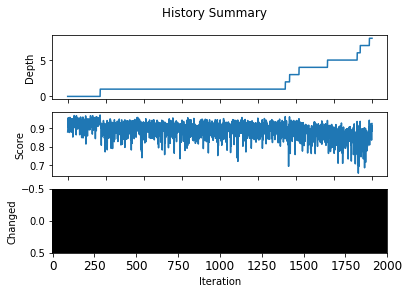

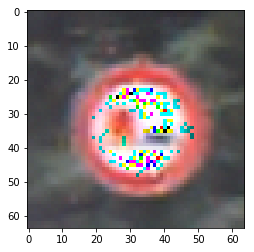

In [21]:

remoteAns = DegGen.remoteDegenerate(remoteImg, remoteAlternation,verbose=True)

#scipyMisc.imsave("resources/remoteDegenerated.png",ans[1])
plt.imshow(remoteAns[1])